In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates

In [53]:
alis = pd.read_excel("svm_data.xlsx", sheet_name="alış_miktarı")
#alis = pd.read_excel("data en en temiz hali arttık.xlsx", sheet_name="alış_miktarı")

In [54]:
alis.head()

,alis_miktari,tarihler,gecen ay,bu ay,Unnamed: 4
0,230,2013-01-01,NaN,230,NaN
1,222,2013-02-01,230.0,222,NaN
2,432,2013-03-01,222.0,432,NaN
3,356,2013-04-01,432.0,356,NaN
4,375,2013-05-01,356.0,375,NaN


In [55]:
alis.tail()
alis.drop([0],axis=0, inplace=True)

In [56]:
alis.head()

,alis_miktari,tarihler,gecen ay,bu ay,Unnamed: 4
1,222,2013-02-01,230.0,222,NaN
2,432,2013-03-01,222.0,432,NaN
3,356,2013-04-01,432.0,356,NaN
4,375,2013-05-01,356.0,375,NaN
5,381,2013-06-01,375.0,381,NaN


In [57]:
alis['tarihler'] = pd.to_datetime(alis['tarihler'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = alis.set_index(['tarihler'])
indexedDataset.head(5)

,alis_miktari,gecen ay,bu ay,Unnamed: 4
tarihler,,,,
2013-02-01,222,230.0,222,NaN
2013-03-01,432,222.0,432,NaN
2013-04-01,356,432.0,356,NaN
2013-05-01,375,356.0,375,NaN
2013-06-01,381,375.0,381,NaN


In [58]:
alis["tarihler"] = pd.to_numeric(alis["tarihler"], errors = "coerce")

In [59]:
indexedDataset.index

DatetimeIndex(['2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01',
               '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01',
               '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
               '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
               '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name='tarihler', freq=None)

In [60]:
t = pd.DataFrame()
t["date"] = indexedDataset.index
t["alis"] = alis["alis_miktari"]

In [61]:
indexedDataset["alis_miktari"]

tarihler
2013-02-01    222
2013-03-01    432
2013-04-01    356
2013-05-01    375
2013-06-01    381
2013-07-01    462
2013-08-01    333
2013-09-01    224
2013-10-01    387
2013-11-01    254
2013-12-01    288
2014-01-01    323
2014-02-01    460
2014-03-01    421
2014-04-01    302
2014-05-01    344
2014-06-01    297
2014-07-01    200
2014-08-01    334
2014-09-01    409
2014-10-01    354
2014-11-01    456
2014-12-01    388
Name: alis_miktari, dtype: int64

In [62]:
t.drop([0],axis=0, inplace=True)
len(t)

22

<BarContainer object of 22 artists>

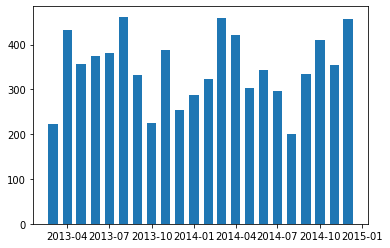

In [63]:
plt.bar(t["date"], t["alis"], width=20) # datanın grafiği

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = alis[["bu ay","gecen ay"]]
y = alis["alis_miktari"]

In [66]:
#X.reshape(-1, 1)

#y.reshape(-1,1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [68]:
from sklearn.svm import SVR

In [69]:
model = SVR()


In [70]:
model.fit(X_train,y_train)

SVR()

In [71]:
predictions = model.predict(X_test)

In [72]:
predictions

array([358.36936694, 356.30921605, 360.37505736, 362.64332248,
       356.07346271, 361.75181403, 360.5492942 ])

In [73]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 58.3258943939445
MSE: 5185.178832826918
RMSE: 72.00818587373881


# GRID SEARCH

In [74]:
param_grid = {'C': [0.1,1, 10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [77]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [78]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [79]:
grid.best_estimator_

SVR(C=1000, gamma=0.0001)

In [80]:
grid_predictions = grid.predict(X_test)

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

MAE: 6.489454725418336
MSE: 43.85106239935243
RMSE: 6.622013470188084


In [82]:
from sklearn.metrics import mean_absolute_percentage_error

In [83]:
mape = mean_absolute_percentage_error(y_test, grid_predictions)
mape

0.019821321567209556

In [84]:
grid_predictions

array([297.09553364, 280.28179735, 346.3657098 , 460.78853943,
       218.31147715, 417.30300277, 349.61084118])

In [85]:
y_test.values

array([302, 288, 354, 456, 224, 409, 356])

In [86]:
# MAD
to = 0
for i in range(len(y_test)):
    to += abs(y_test.values[i] - grid_predictions[i])
to /= len(y_test)
to

6.489454725418336

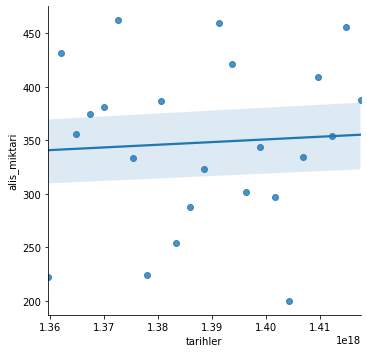

In [87]:
# datanın grafiği regresyon
sns.lmplot(x='tarihler',y='alis_miktari',data=alis)

In [88]:
grid_predictions # grid ile bulunan dogru parametrelerle yapılan tahminler

array([297.09553364, 280.28179735, 346.3657098 , 460.78853943,
       218.31147715, 417.30300277, 349.61084118])

In [89]:
y_test.values

array([302, 288, 354, 456, 224, 409, 356])

In [90]:
tmp = pd.DataFrame()
tmp["y_test"] = y_test.values
tmp["predictions"] = grid_predictions

In [91]:
tmp

,y_test,predictions
0,302,297.095534
1,288,280.281797
2,354,346.365710
3,456,460.788539
4,224,218.311477
5,409,417.303003
6,356,349.610841


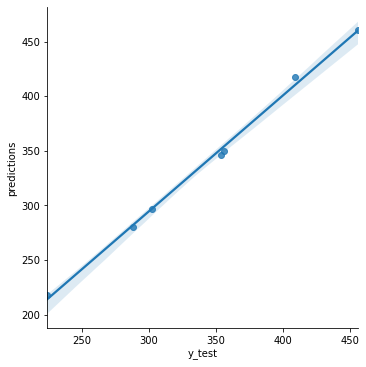

In [93]:
# regresyon grafiği asıl olan
sns.lmplot(x='y_test',y='predictions',data=tmp)


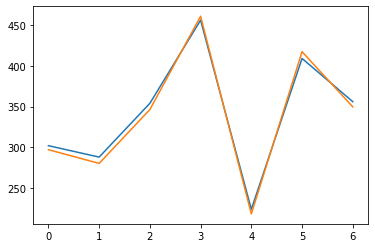

In [94]:
plt.plot(tmp) # mavi test datası turuncu tahminler

In [95]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
#X_test = np.array(X_test).reshape(-1, 1)
x_train = scx.fit_transform(X_train)
x_test = scx.transform(X_test)
y_train = scy.fit_transform(y_train)
y_test = scy.transform(y_test)


y_pred = np.array(scy.inverse_transform(grid_predictions))
y_pred = y_pred.reshape(-1,1)
x_test = np.array(scx.inverse_transform(X_test))



#Predict the future values by entering number of days since onset  

y_pred = scy.inverse_transform(grid.predict(scx.transform([[12]])))
print(y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[375. 432. 297. 460. 222. 462. 334. 381. 387. 421. 254. 344. 388. 333.
 200. 323.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [96]:
# tahminler
array=[375., 432., 297., 460., 222., 462., 334., 381. ,387., 421., 254., 344., 388., 333.,
 200., 323.]